<div style="display: flex; background-color: RGB(3,190,252);" >
<h1 style="margin: auto; padding: 30px; "> Rapport sur le bonheur dans le monde </h1>
</div>



<img src="images/Mapmonde.jpg" style="width:600px;height:300px" alt = "Mapmonde" >

<b>Contexte du projet</b> <br>
Dans cette étude de cas, nous formerons un algorithme d'apprentissage automatique non supervisé pour regrouper les pays en fonction de caractéristiques telles que la production économique, le soutien social, l'espérance de vie, la liberté, l'absence de corruption et la générosité. Le Rapport sur le bonheur dans le monde détermine l'état du bonheur mondial. Les scores de bonheur et les données de classement ont été collectés en demandant aux individus de classer leur vie de 0 (la pire vie possible) à 10 (la meilleure vie possible).
<br> <br>
<b>Ressources</b> <br>
https://fr.wikipedia.org/wiki/Rapport_mondial_sur_le_bonheur<br>
https://en.wikipedia.org/wiki/Elbow_method_(clustering) <br>
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/<br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
#iMPORT ML
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve 
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV,cross_val_predict 
from sklearn import cluster, metrics
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [35]:
# Téléchargement du fichier
data = pd.read_csv('Rapport-bonheur.csv', sep=',')
#Affichage de la donnée
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<div style="display: flex; background-color: RGB(252,190,3);" >
<h1 style="margin: auto; padding: 20px;  ">Analyse et Exploration des données</h1>
</div> 

In [3]:
# Informations sur les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
#Résumé statistique de la donnée
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
# Table de corrélation des variables numériques
data.corr().style.background_gradient()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:title={'center':'Visualisation de la matrice de correlation'}>

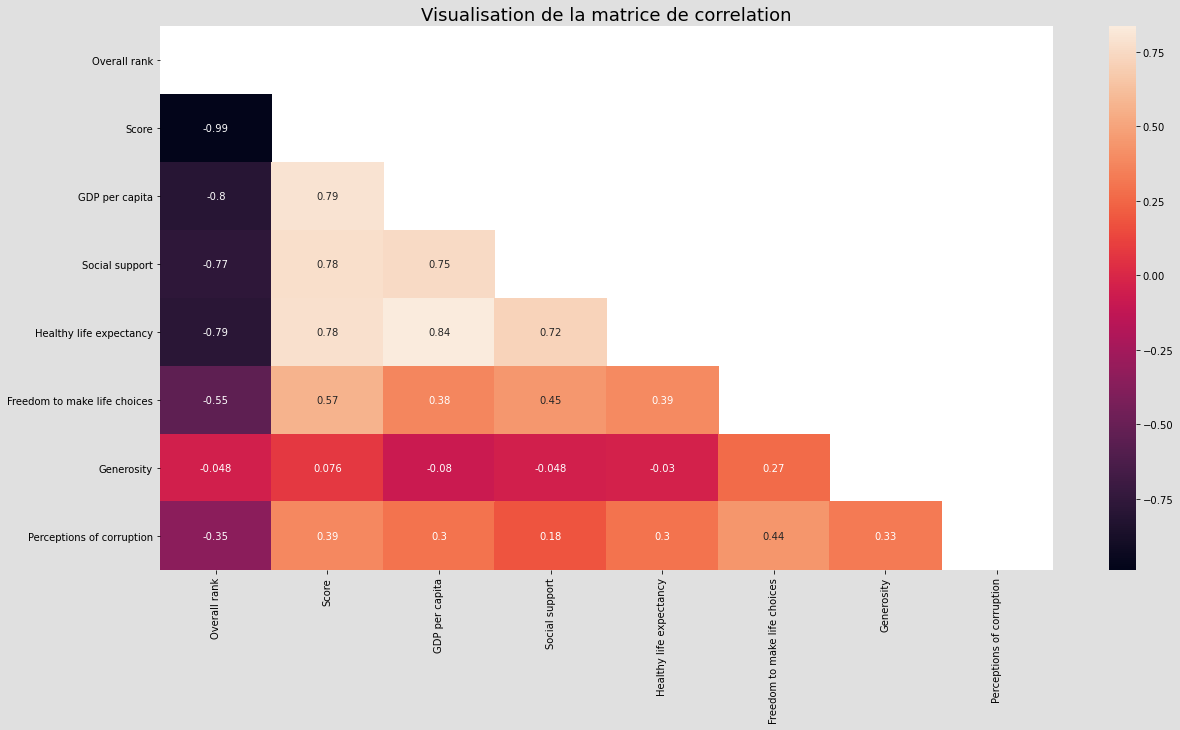

In [6]:
#Matrice de corrélation
fig=plt.figure(figsize=(20,10))
fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.5)
plt.title("Visualisation de la matrice de correlation",size=18)
sns.heatmap(data.corr(),annot=True, mask = np.triu(np.ones_like(data.corr(), dtype=bool)))

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Visualisations des données et des interactions entre les variable </h2>
</div> 

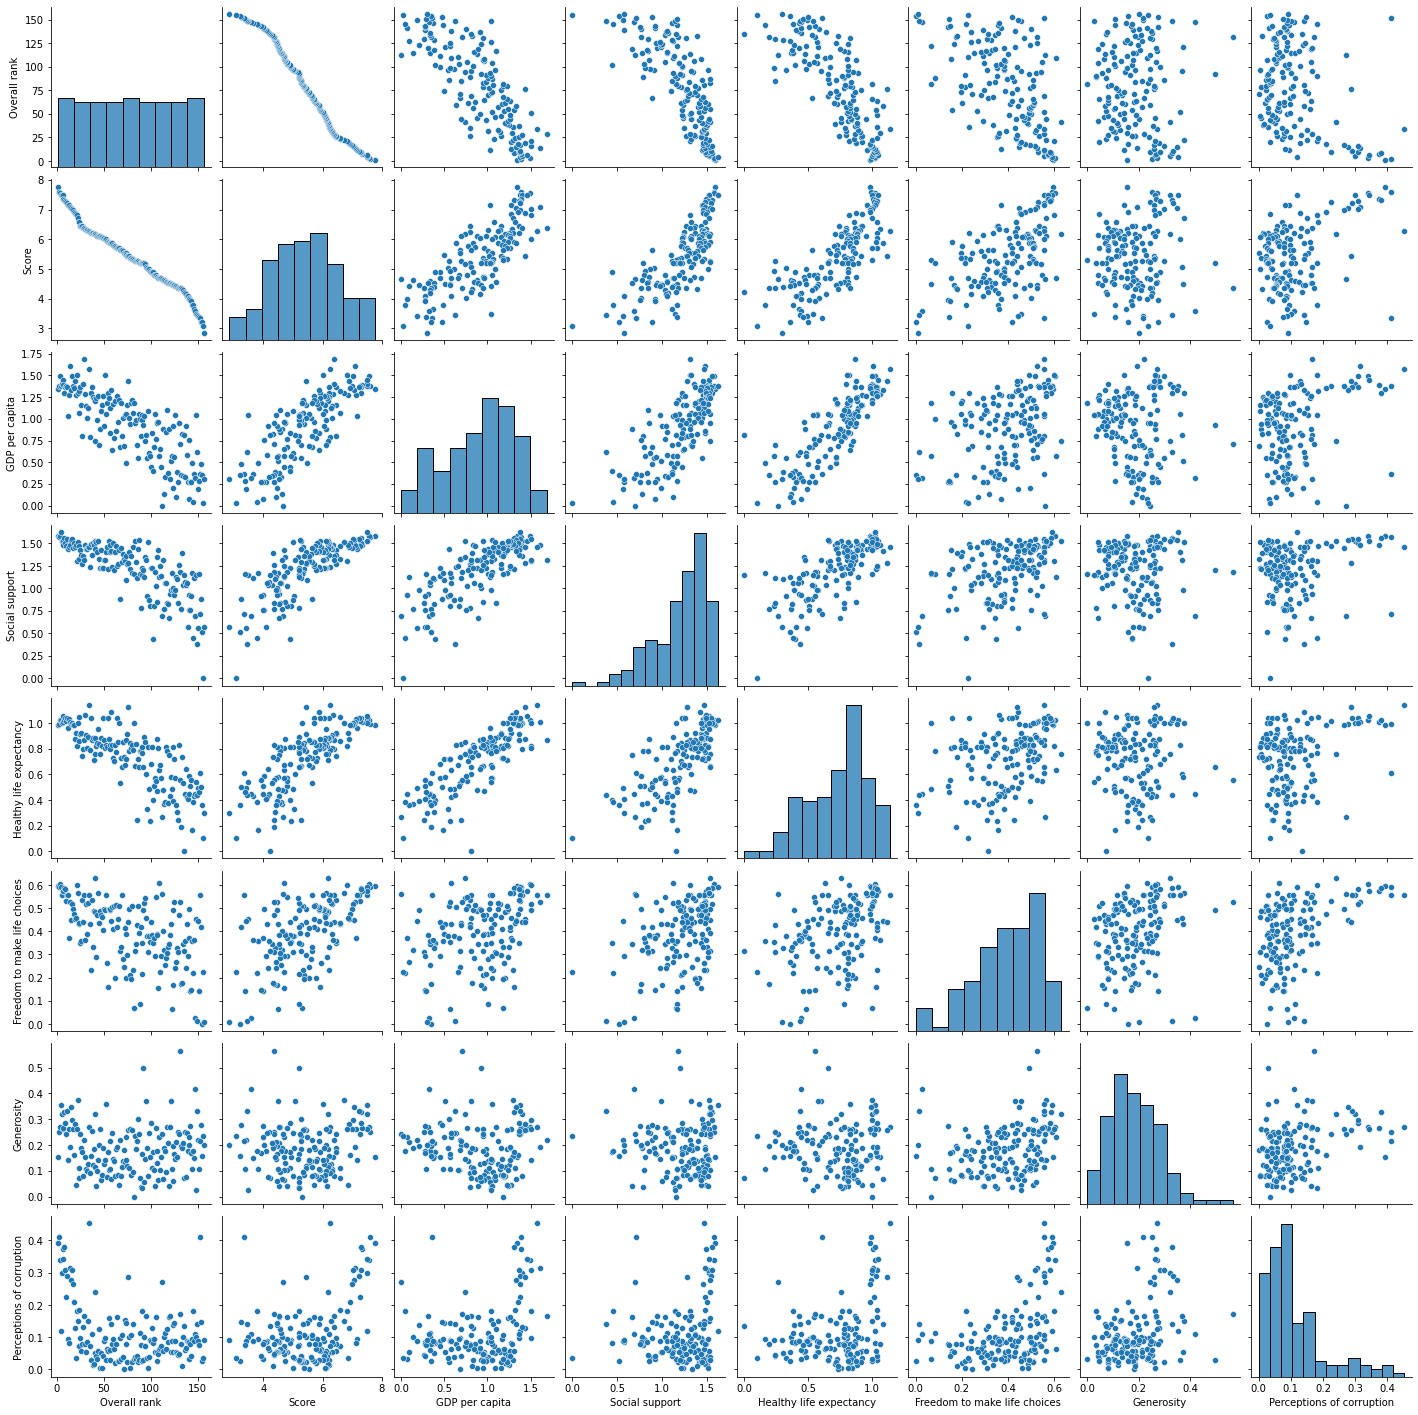

In [13]:
# Aperçu graphiques des données 
sns.pairplot(data)  #hue="Country or region"
# Trop de warning avec l'ajout d'un hue 

In [10]:
#Distribution de divers variables
""" 
fig = px.line(data, color='Score', symbol="Country or region")
fig.show()
"""
#A refaire en fonction des années apres ajout de données des annéés précédentes et de 2021

' \nfig = px.line(data, color=\'Score\', symbol="Country or region")\nfig.show()\n'

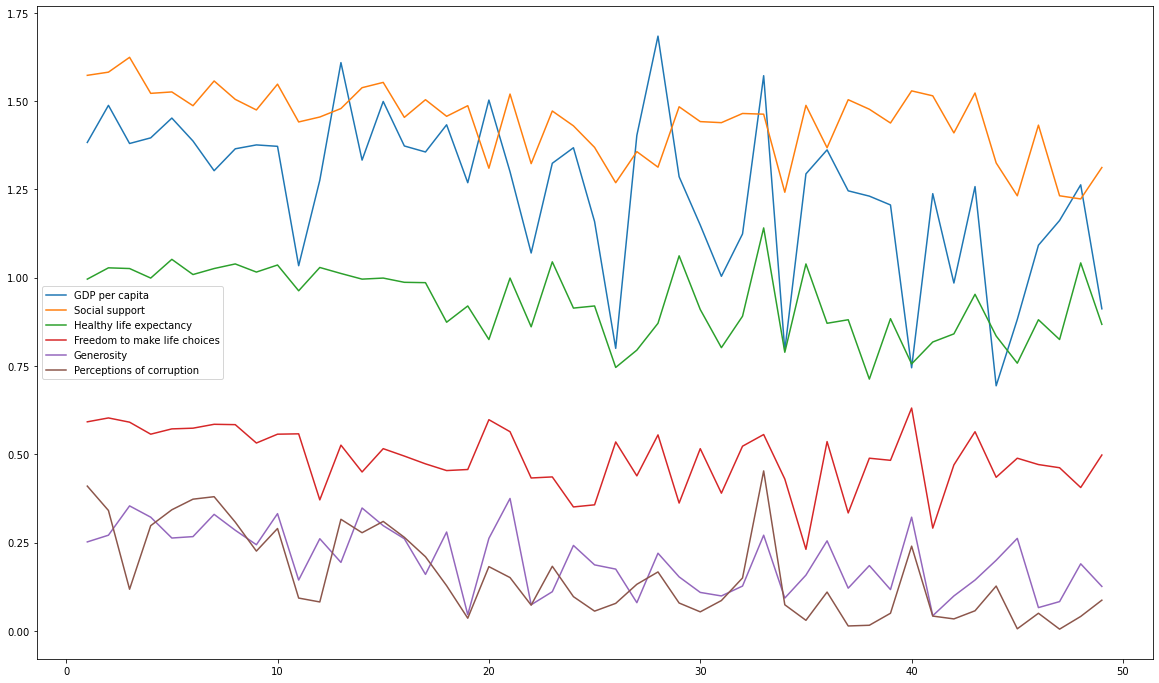

In [8]:
#Distribution de divers variables
plt.figure(figsize=(20,12))
plt.plot(data[["GDP per capita" ,"Social support", "Healthy life expectancy", "Freedom to make life choices","Generosity","Perceptions of corruption" ]][1:50])
plt.legend([ "GDP per capita" ,"Social support", "Healthy life expectancy", "Freedom to make life choices","Generosity","Perceptions of corruption" ])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Visualisation des données après réduction par TSNE </h3>
</div>

In [87]:
#Le modéle
model_TSNE = TSNE(n_components = 3, random_state = 0)

In [88]:
#Réduction des la data en 3 dimenions 
tsne = model_TSNE.fit_transform(X) 

In [89]:
# Dataframe avec les données pour la représentation graphique
tsne = pd.DataFrame(tsne, columns =("Dim_1", "Dim_2", "Dim_3")) 
tsne['Overall rank'] = data['Overall rank']
tsne['Country or region'] = data['Country or region']
tsne

,Dim_1,Dim_2,Dim_3,Overall rank,Country or region
0,-160.808853,17.150986,-47.668282,1,Finland
1,-125.067978,24.907440,-79.520439,2,Denmark
2,-141.058685,-6.307659,-114.833221,3,Norway
3,-121.106743,-40.248768,-104.624199,4,Iceland
4,-50.662384,-5.305099,-167.349747,5,Netherlands
...,...,...,...,...,...
151,106.584938,-94.116158,53.116840,152,Rwanda
152,127.285126,-102.410606,20.386608,153,Tanzania
153,148.715775,23.231594,51.556717,154,Afghanistan
154,144.514526,-96.133537,69.570686,155,Central African Republic


In [90]:
#Représentation 3D avec plotly

fig = px.scatter_3d(tsne, x='Dim_1', y='Dim_2', z='Dim_3', color='Overall rank',text="Country or region")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Visualisations de quelques variables </h3>
</div>

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution de la variable Score')

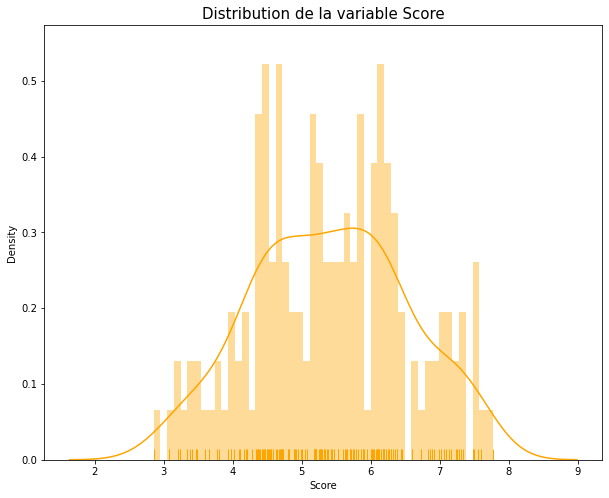

In [14]:
#Histogramme de la variable score
fig=plt.figure(figsize=(10,8))
sns.distplot(data['Score'], bins=50, kde=True, rug=True, color="orange")
plt.title('Distribution de la variable Score', size=15)

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution du PIB par habitant')

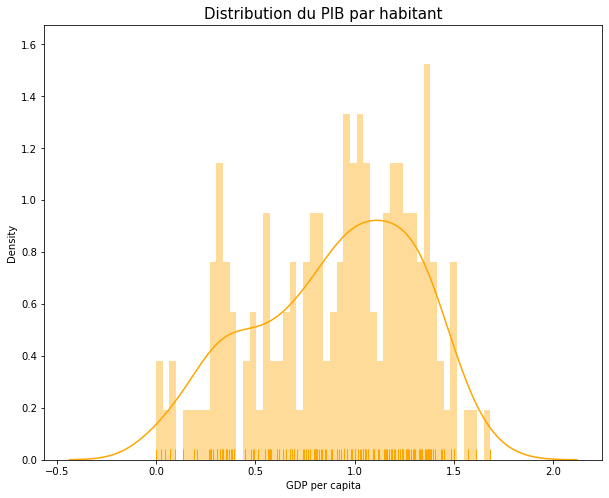

In [21]:
#Histogramm of GDP per capita
fig=plt.figure(figsize=(10,8))
sns.distplot(data['GDP per capita'],  bins=50, kde=True, rug=True, color="orange")
plt.title('Distribution du PIB par habitant', size=15)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Rapport de corrélation entre le score d'un pays et les autres indicateurs</h3>
</div>

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 720x576 with 0 Axes>

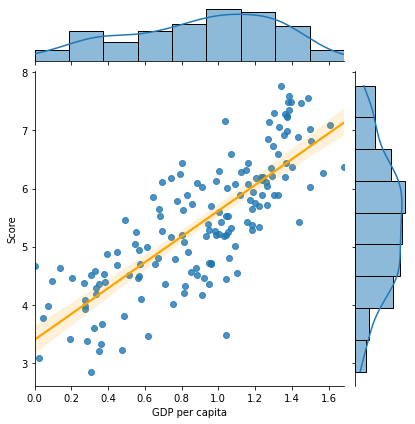

In [15]:
#rapport de corrélation entre le PIB d'un pays ou d'une région et son score 
fig = plt.figure(figsize=(10,8))
sns.jointplot('GDP per capita', 'Score',  data= data, kind='reg', line_kws={"color" :"orange"})  #kind='kde'


In [11]:
#rapport de corrélation entre le PIB d'un pays ou d'une région et son score 
fig = px.scatter(data, x='GDP per capita', y='Score', color='Country or region', size='Overall rank')
fig.show()

In [12]:
#rapport de corrélation entre l'espèrance de vie des habitants etl e score du pays
fig = px.scatter(data, x='Healthy life expectancy', y='Score', color='Country or region', size='Overall rank')
fig.show()

In [13]:
#rapport de corrélation entre l'aide social aux habitants et le score du pays
fig = px.scatter(data, x='Social support', y='Score', color='Country or region', size='Overall rank')
fig.show()

In [14]:
#rapport de corrélation entre la générosité des habitants et le score du pays
fig = px.scatter(data, x='Generosity', y='Score', color='Country or region', size='Overall rank')
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Rapport entre le PIB et l'espèrance de vie 
</div>

Text(0, 0.5, 'PIB')

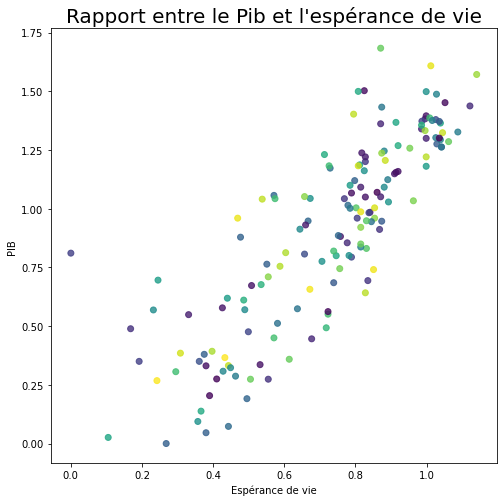

In [20]:
# Nuage de points "simple" entre entre le PIB et l'espérance de vie
N = data.shape[0]
colors = np.random.rand(N)
plt.figure(figsize=(8,8))
plt.scatter(data["Healthy life expectancy"], data["GDP per capita"], c=colors, alpha=0.8)
plt.title('Rapport entre le Pib et l\'espérance de vie',size=20)
plt.xlabel('Espérance de vie')
plt.ylabel('PIB')


In [15]:
#rapport de corrélation entre la générosité des habitants et le score du pays
fig = px.scatter(data, x="Healthy life expectancy", y="GDP per capita", color='Country or region', size='Overall rank')
fig.show()

<div style="background-color: RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:#fff; "> Les indicateurs statistiques </h3>
</div> 

In [25]:
#Les noms et types des colonnes
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [16]:
# Data contenant uniquement les variables numériques
data_num = data.select_dtypes(['int64','float64','int32'])
data_num

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [17]:
# Les colonnes de types numériques
set(data_num.columns)


{'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Healthy life expectancy',
 'Overall rank',
 'Perceptions of corruption',
 'Score',
 'Social support'}

In [18]:
indicateurs = set(data_num.columns)
indicateurs

{'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Healthy life expectancy',
 'Overall rank',
 'Perceptions of corruption',
 'Score',
 'Social support'}

In [19]:
#je reccupère les indicateurs sans  'Score' et 'Overall rank' pour afficher la dispersion
#Les éléments à supprimer
set1 = {'Score','Overall rank'}
indicateurs = indicateurs.difference(set1)
indicateurs

{'Freedom to make life choices',
 'GDP per capita',
 'Generosity',
 'Healthy life expectancy',
 'Perceptions of corruption',
 'Social support'}

Text(0.5, 1.0, 'Dispersion des variables numériques')

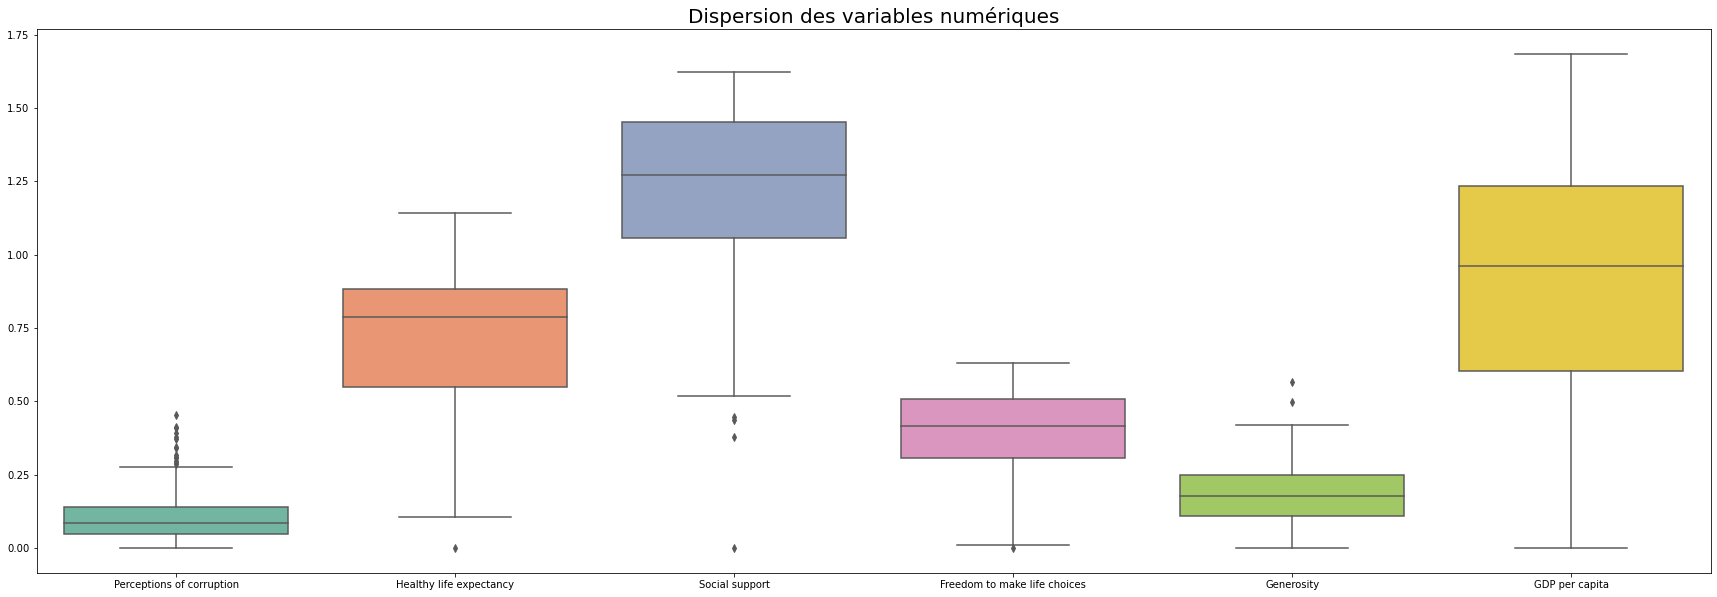

In [30]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data[indicateurs], orient="v", palette="Set2")
plt.title('Dispersion des variables numériques',size=20)

<AxesSubplot:>

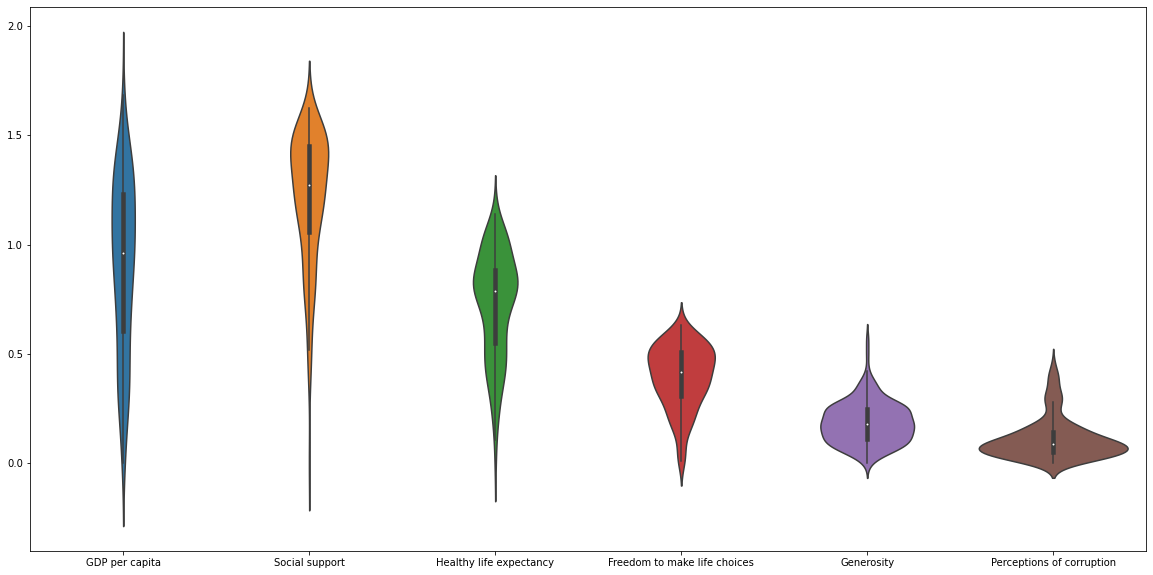

In [144]:
plt.figure(figsize=(20,10))
sns.violinplot(data=data[indicateurs])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Mesures de tendance centrale, de dispersion  et de concentration </h3>
</div>
  

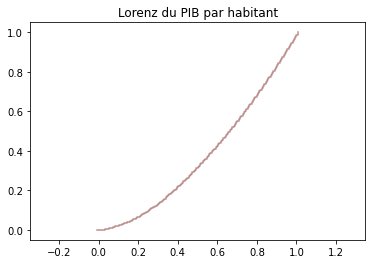

In [199]:
# -----  Mesure de concentration ; courbe de Lorenz et indice de GINI ----

# Tracé courbe de Lorenz  du pib améliorée
pib = data['GDP per capita'].values 
n = len(pib)


lorenz = np.cumsum(np.sort(pib)) / pib.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, lorenz, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.title("Lorenz du PIB par habitant")
plt.show()

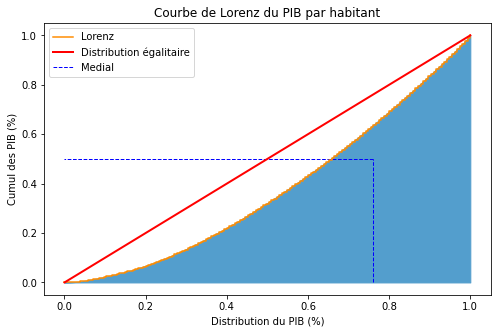

In [192]:
# -------------- Mesure de concentration ; courbe de Lorenz et indice de GINI
# Tracé courbe de Lorenz du PIB par habitant

PIB = data['GDP per capita'].values 
n = len(PIB)


lorenz_pib = np.cumsum(np.sort(PIB)) / PIB.sum()
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0,1,len(lorenz_pib)), lorenz_pib, drawstyle='steps-post', color='darkorange', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_pib)) ,lorenz_pib , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du PIB par habitant')
plt.xlabel("Distribution du PIB (%)")
plt.ylabel("Cumul des PIB (%)")
plt.legend(loc="best")

plt.show()


In [200]:
#Calcul de l'indice de GINI
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.24996767701419897

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Machine Learning </h1>
</div>

In [38]:
X = data_num.values
X

array([[1.000e+00, 7.769e+00, 1.340e+00, ..., 5.960e-01, 1.530e-01,
        3.930e-01],
       [2.000e+00, 7.600e+00, 1.383e+00, ..., 5.920e-01, 2.520e-01,
        4.100e-01],
       [3.000e+00, 7.554e+00, 1.488e+00, ..., 6.030e-01, 2.710e-01,
        3.410e-01],
       ...,
       [1.540e+02, 3.203e+00, 3.500e-01, ..., 0.000e+00, 1.580e-01,
        2.500e-02],
       [1.550e+02, 3.083e+00, 2.600e-02, ..., 2.250e-01, 2.350e-01,
        3.500e-02],
       [1.560e+02, 2.853e+00, 3.060e-01, ..., 1.000e-02, 2.020e-01,
        9.100e-02]])

<div style="background-color: RGB(143, 166, 158);" >
<h2 style="margin: auto; padding: 10px;  ">KMeans</h2>
</div> 

In [39]:
#Utilisation de la méthode elbow pour trouver le nombre optimal de clusters

mapping2 = {}
inertia = []
for i in range(1, 11):
    # Building and fitting the model
    kmeansModel = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeansModel.fit(X)
    inertia.append(kmeansModel.inertia_)
    mapping2[i] = kmeansModel.inertia_

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



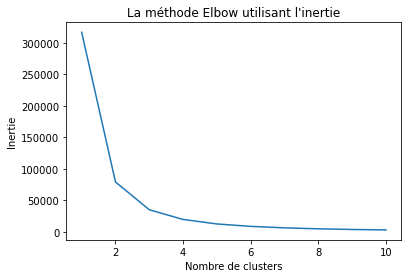

In [40]:
# Affichage de la courbe de la méthode Elbow
plt.plot(range(1, 11), inertia)
plt.title('La méthode Elbow utilisant l\'inertie')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [41]:
#Cluster K-means
modelKM = KMeans(n_clusters=3,  random_state = 0)
#Entrainement
modelKM.fit(X)                    

KMeans(n_clusters=3, random_state=0)

In [27]:
# Les prédictions du modèle
#y_pred = modelKM.predict(X)
#y_pred

In [42]:
#Les clusters prédits par le modéle <==>  y_pred = modelKM.predict(X)
clusters = modelKM.labels_
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [43]:
#Les centroids des clusters
modelKM.cluster_centers_

array([[2.65000000e+01, 6.64480769e+00, 1.25161538e+00, 1.44207692e+00,
        9.25980769e-01, 4.90923077e-01, 2.02211538e-01, 1.58596154e-01],
       [1.30500000e+02, 4.17019231e+00, 5.20615385e-01, 9.36153846e-01,
        4.96288462e-01, 3.13865385e-01, 1.93903846e-01, 9.65769231e-02],
       [7.85000000e+01, 5.40628846e+00, 9.43211538e-01, 1.24821154e+00,
        7.53461538e-01, 3.72923077e-01, 1.58423077e-01, 7.66346154e-02]])

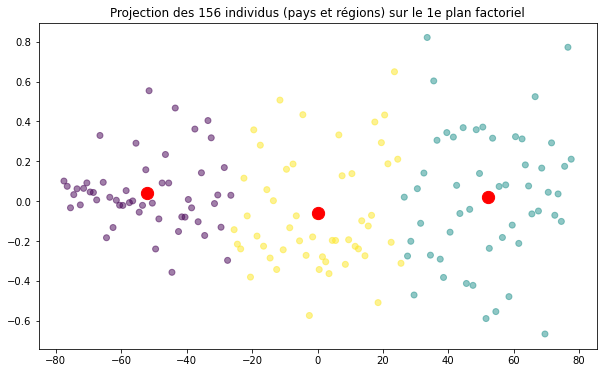

In [63]:
# Affichage du clustering par projection des individus sur le plan factoriel

# La réduction de dimensions à n = 3 
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
#Projection
plt.figure(figsize=(10,6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float64), cmap = 'viridis', alpha=.5)

# Ajout des centroïds sur la projection 

centroids = modelKM.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],s=150,c='red' )
plt.title("Projection des {} individus (pays et régions) sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)


In [65]:
# Affichage ddes clusters avec plotly

fig = px.scatter(X_projected[:, 0], X_projected[:, 1], color=clusters.astype(np.float64))
# Ajout des centroïds sur la projection 
#fig = px.scatter(centroids_projected[:,0],centroids_projected[:,1])

fig.show()

In [66]:
X_projected 

array([[-7.75374263e+01,  1.00986108e-01, -3.95576338e-01],
       [-7.65339452e+01,  7.45066204e-02, -2.87711871e-01],
       [-7.55340631e+01, -3.33204312e-02, -2.45466546e-01],
       [-7.45322116e+01,  3.27969803e-02, -2.62717991e-01],
       [-7.35319622e+01,  6.19846271e-02, -2.20169011e-01],
       [-7.25328056e+01, -1.87661344e-02, -2.14748029e-01],
       [-7.15290003e+01,  6.41162985e-02, -1.40778282e-01],
       [-7.05283328e+01,  9.16863228e-02, -2.06970488e-01],
       [-6.95281413e+01,  4.60747904e-02, -1.44033420e-01],
       [-6.85273808e+01,  4.34987209e-02, -9.47697664e-02],
       [-6.75278140e+01,  6.09134348e-03, -1.65029945e-01],
       [-6.65232698e+01,  3.29796816e-01, -1.38671760e-01],
       [-6.55246731e+01,  9.44761852e-02, -3.44843315e-02],
       [-6.45266633e+01, -1.83628437e-01,  4.42800535e-03],
       [-6.35242686e+01,  1.93795954e-02, -9.63302205e-02],
       [-6.25252054e+01, -1.32404660e-01, -6.75998348e-02],
       [-6.15231560e+01,  4.54534249e-03

In [77]:
data_pca = pd.DataFrame(X_projected, columns =("Dim_1", "Dim_2", "Dim_3")) 
data_pca['Score'] = data['Score']
data_pca['Country or region'] = data['Country or region']
data_pca['Overall rank'] = data['Overall rank']
data_pca['cluster'] = clusters

In [78]:
data_pca

,Dim_1,Dim_2,Dim_3,Score,Country or region,Overall rank,cluster
0,-77.537426,0.100986,-0.395576,7.769,Finland,1,0
1,-76.533945,0.074507,-0.287712,7.600,Denmark,2,0
2,-75.534063,-0.033320,-0.245467,7.554,Norway,3,0
3,-74.532212,0.032797,-0.262718,7.494,Iceland,4,0
4,-73.531962,0.061985,-0.220169,7.488,Netherlands,5,0
...,...,...,...,...,...,...,...
151,73.531473,0.036236,0.162762,3.334,Rwanda,152,1
152,74.532838,-0.101780,0.194420,3.231,Tanzania,153,1
153,75.537342,0.174867,0.496236,3.203,Afghanistan,154,1
154,76.545512,0.772592,0.667042,3.083,Central African Republic,155,1


In [85]:
fig = px.scatter_3d(data_pca, x='Dim_1', y='Dim_2', z='Dim_3', color='cluster', size='Overall rank')
fig.show()
#,text='Country or region'

,Dim_1,Dim_2,Dim_3,rank,Country
0,-160.808853,17.150986,-47.668282,1,Finland
1,-125.067978,24.907440,-79.520439,2,Denmark
2,-141.058685,-6.307659,-114.833221,3,Norway
3,-121.106743,-40.248768,-104.624199,4,Iceland
4,-50.662384,-5.305099,-167.349747,5,Netherlands
...,...,...,...,...,...
151,106.584938,-94.116158,53.116840,152,Rwanda
152,127.285126,-102.410606,20.386608,153,Tanzania
153,148.715775,23.231594,51.556717,154,Afghanistan
154,144.514526,-96.133537,69.570686,155,Central African Republic


In [80]:
#Représentation 3D avec plotly

fig = px.scatter_3d(tsne, x='Dim_1', y='Dim_2', z='Dim_3', color='rank',text="Country")
fig.show()
#text="Country"